## CGLMP NN

This is the truth-level NN codes gor Bell Study. Modify from Siang-Yuan's notebook.

> Author : Y.Y. Gary Peng, S.Y. Lin  
> Istitute: National Tsing Hua University, Taiwan and ATLAS experiment, CERN  
> License : MIT  
> Data : Aug. 03, 2023  
> Email : yuan-yen.peng@cern.ch

Version : 5.0


In [1]:
import os
import gc
import glob
import warnings
import numpy as np
import pandas as pd
from scipy import stats
from numba import njit
import matplotlib.pyplot as plt

In [2]:
def get_files_names(path):
    files_name = glob.glob(path)
    return files_name

path = "../../../../truth/signal/*.npz"
files_name = get_files_names(path)
print(files_name)

def get_data(path):
    try:
        with np.load(path, allow_pickle=True) as f:
            data_dict = {name: f[name] for name in f.files}
            return pd.DataFrame(data_dict)
    except FileNotFoundError:
        print("File not found!")
        return pd.DataFrame()
    
files = []
files_name.sort()
for f in files_name:
    files.append(get_data(f))
    
# need to check the order of data name.
print(files_name)

# need to follow the order of data name.
(
    CGLMP,
    Higgs,
    LeadLep,
    LepM,
    LepP,
    NuM,
    NuP,
    MET,
    Wm,
    Wp,
    diLep,
    SubLep,
    Xi,
) = files
GEV=1e3

del files_name, files
gc.collect()

['../../../../truth/signal/LeptonP.npz', '../../../../truth/signal/subLeadLepton.npz', '../../../../truth/signal/CGLMP.npz', '../../../../truth/signal/xi_xyz.npz', '../../../../truth/signal/diLepton.npz', '../../../../truth/signal/LeadLepton.npz', '../../../../truth/signal/MET.npz', '../../../../truth/signal/Higgs.npz', '../../../../truth/signal/WmBoson.npz', '../../../../truth/signal/LpNu.npz', '../../../../truth/signal/LmNu.npz', '../../../../truth/signal/LeptonM.npz', '../../../../truth/signal/WpBoson.npz']
['../../../../truth/signal/CGLMP.npz', '../../../../truth/signal/Higgs.npz', '../../../../truth/signal/LeadLepton.npz', '../../../../truth/signal/LeptonM.npz', '../../../../truth/signal/LeptonP.npz', '../../../../truth/signal/LmNu.npz', '../../../../truth/signal/LpNu.npz', '../../../../truth/signal/MET.npz', '../../../../truth/signal/WmBoson.npz', '../../../../truth/signal/WpBoson.npz', '../../../../truth/signal/diLepton.npz', '../../../../truth/signal/subLeadLepton.npz', '../../

66

In [3]:
# Some constants
GEV = 1e3
# RMV_EVT = [638488, 835579, 2168342] # escape some mathmetical errors.
RMV_EVT = [] # escape some mathmetical errors.

In [4]:
# # DiNu info.
# DUNI_M = 34.141
# dinu_kin = pd.DataFrame({
#     'lep_p_M' : DUNI_M,
#     'lep_p_px': MET['px'],
#     'lep_p_py': MET['py'],
#     'lep_p_pz': diNu_pz,
# })

# # check format l+ -> (E, px, py, pz); then, append l- with the same format of l+.
# print(dinu_kin.shape)
# dinu_kin.drop(RMV_EVT, inplace=True)
# print(dinu_kin.shape)
# dinu_kin.head(5)

In [5]:
# Kinemetic info of leptons.
lep_kin = pd.DataFrame({
    'lep_p_E' : LepP['E'],
    'lep_p_px': LepP['px'],
    'lep_p_py': LepP['py'],
    'lep_p_pz': LepP['pz'],
    'lep_m_E' : LepM['E'],
    'lep_m_px': LepM['px'],
    'lep_m_py': LepM['py'],
    'lep_m_pz': LepM['pz'],
})/GEV

# check format l+ -> (E, px, py, pz); then, append l- with the same format of l+.
print(lep_kin.shape)
lep_kin.drop(RMV_EVT, inplace=True)
print(lep_kin.shape)
lep_kin.head(5)

(2928862, 8)
(2928862, 8)


,lep_p_E,lep_p_px,lep_p_py,lep_p_pz,lep_m_E,lep_m_px,lep_m_py,lep_m_pz
0,19.465703,-5.065763,16.360542,-9.250574,12.031222,11.081455,2.673936,-3.847299
1,131.817141,8.901175,2.966260,131.482766,66.401992,-13.096559,14.755815,63.403242
2,94.193734,-3.040100,49.431305,80.123430,26.267500,7.589698,1.677931,25.090863
3,165.226891,4.702402,-19.638676,163.988219,36.290188,0.038865,20.284725,30.091441
4,6.403636,5.808921,-2.135702,-1.643704,32.603137,11.729594,30.418752,0.263776


In [6]:
# Kinemetic info of neutirnos.
nu_kin = pd.DataFrame({
    'nu_p_E' : NuP['E'],
    'nu_p_px': NuP['px'],
    'nu_p_py': NuP['py'],
    'nu_p_pz': NuP['pz'],
    'nu_m_E' : NuM['E'],
    'nu_m_px': NuM['px'],
    'nu_m_py': NuM['py'],
    'nu_m_pz': NuM['pz'],
})/GEV

# check format nu+ -> (E, px, py, pz); then, append nu- with the same format of l+.
print(nu_kin.shape)
nu_kin.drop(RMV_EVT, inplace=True)
print(nu_kin.shape)
nu_kin.head(5)

(2928862, 8)
(2928862, 8)


,nu_p_E,nu_p_px,nu_p_py,nu_p_pz,nu_m_E,nu_m_px,nu_m_py,nu_m_pz
0,75.449547,-5.933027,30.212092,68.881516,46.680430,27.464617,28.449271,24.807184
1,226.696359,59.309223,-25.300893,217.332734,384.335750,83.522359,-10.934743,374.991219
2,8.372312,-7.214337,-4.222511,-0.468329,66.342891,3.095675,-48.527266,45.132035
3,10.764710,-1.976395,-5.639073,-8.953977,30.333172,-17.860195,-11.609113,21.594980
4,71.970891,-19.597881,-10.960046,68.378430,82.460156,-2.266198,-15.764699,80.907453


In [7]:
# CGLMP.
CGLMP = pd.DataFrame({
    'Bxy' : CGLMP['Bxy'],
    'Byz' : CGLMP['Byz'],
    'Bzx' : CGLMP['Bzx'],
})

# check
print(CGLMP.shape)
CGLMP.drop(RMV_EVT, inplace=True)
print(CGLMP.shape)
CGLMP.head(5)

(2928862, 3)
(2928862, 3)


,Bxy,Byz,Bzx
0,5.379610,-0.375224,8.00803
1,-4.331580,15.150000,-5.99553
2,4.612100,21.715400,19.46050
3,-12.159800,-1.537670,-5.16628
4,-0.905081,24.782200,6.81644


## The CGLMP expectation value:

\begin{align*}
\mathrm{tr}(\rho \mathcal{B}_\text{CGLMP}^{xy})
= \frac{8}{ \sqrt{3} } & \langle \xi_x^+\xi_x^- + \xi_x^+\xi_x^- \rangle \\
+ 25 & \langle [{\xi_x^+}^2 - {\xi_y^+}^2][{\xi_x^-}^2 - {\xi_y^-}^2] \rangle \\
+ 100 & \langle \xi_x^+ \xi_y^+ \xi_x^- \xi_y^- \rangle
\end{align*}


\begin{equation*}
\mathcal{I}_3 = \mathrm{max}(
\langle \mathcal{B}_\text{CGLMP}^{xy} \rangle,
\langle \mathcal{B}_\text{CGLMP}^{yz} \rangle,
\langle \mathcal{B}_\text{CGLMP}^{zx} \rangle )
\end{equation*}


The ensemble of decays has rotational symmetry in the Higgs boson rest frame around the direction of the W boson momenta.  
Hence in this Letter, rather than testing every possible pair of axes 
we **choose a set of Cartesian coordinates**  
in which **one axis is aligned with this privileged direction**,  
**construct expectation values for each** of the $(x, y)$, $(y, z)$ and $(z, x)$ **pairs of axes**,  
and **compare the largest of them**.

## Baseline model: $\mathcal{B}_{*z}$ Regression
Baseline model uses only *low level features*
* Features:
    * four-vector component ($E, p_x, p_y, p_z$)
        * alternate four-vector ($M, p_T, \eta, \phi$)
* Input particles (available four-vectors):
    * Positive/Negative charged leptons
        * leading/sub-leading lepton
    * Di-Lepton system
    * Missing Transverse momentum
        * $p_x$, $p_y$
        * $p_T$, $\phi$

[Visualize neural network](http://alexlenail.me/NN-SVG/index.html)

In [8]:
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import tensorflow as tf
print(tf.config.list_physical_devices())
from tensorflow import keras
from tensorflow.keras import layers
# os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID' # If the line below doesn't work, uncomment this line (make sure to comment the line below); it should help.
print(tf.__version__)

# install lbn
# !pip install lbn --upgrade --quiet
from lbn import LBN, LBNLayer

# install keras tuner
# !pip install keras-tuner --upgrade --quiet
# import keras_tuner as kt

2023-10-27 06:05:43.712406: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
2.13.0


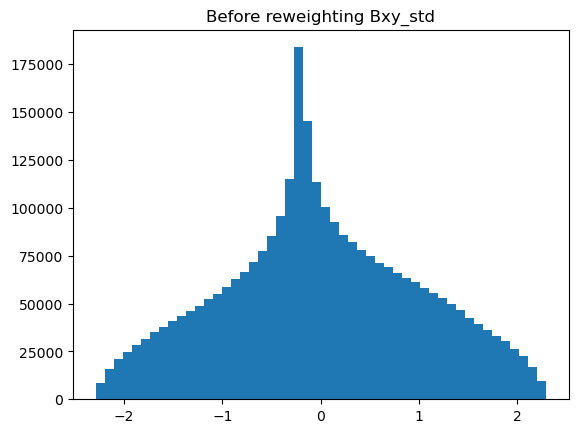

2.299248862698251 -2.292063273788311
std: 1.0000000000000007
2928862


In [9]:
# %%time

from sklearn.preprocessing import StandardScaler

SCALAR = StandardScaler()
Bxy_std = SCALAR.fit_transform([[x] for x in CGLMP['Bxy']]).flatten() # zero mean and unit variance
plt.hist(Bxy_std, bins=50)
plt.title("Before reweighting Bxy_std")
plt.show()
print(Bxy_std.max(), Bxy_std.min())
print("std:", Bxy_std.std())
print(len(Bxy_std))

In [10]:
# Undersampling to an uniform distribution

n = int(1e2)
step = (Bxy_std.max() - Bxy_std.min())/n
intervals = [Bxy_std.min() + i*step for i in range(n)]

sampling = int(1e3)
indices_arr = np.empty((n-1, sampling), dtype=int)
for i in range(n-1):
    try:
        indices_arr[i] = np.random.choice(np.where((intervals[i]<Bxy_std)*(Bxy_std<=intervals[i+1]))[0], size=sampling, replace=False)
    except ValueError:
        print("Cannot take a larger sample than population when 'replace=False")
        break

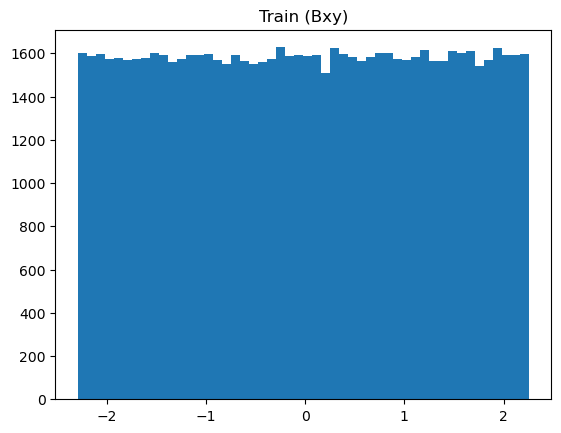

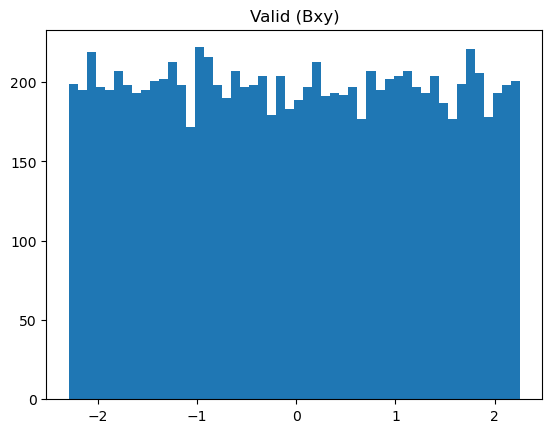

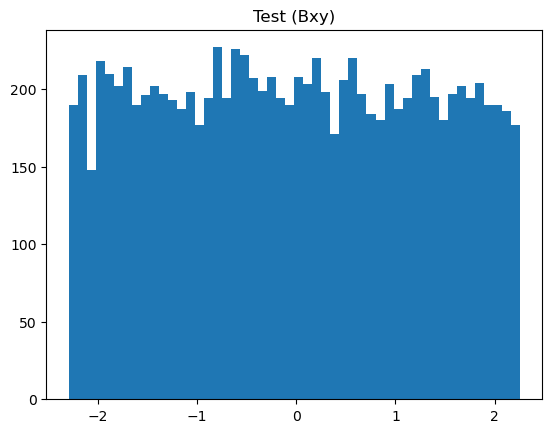

With the same shapes...

Training data shape: (79200, 4, 4)
Testing data shape: (9900, 4, 4)
Validation data shape: (9900, 4, 4)
None


In [11]:
from sklearn.model_selection import train_test_split

lepton_features   = ['lep_p_E','lep_p_px','lep_p_py','lep_p_pz',
                    'lep_m_E','lep_m_px','lep_m_py','lep_m_pz']
neutrino_features = ['nu_p_E','nu_p_px','nu_p_py','nu_p_pz',
                    'nu_m_E','nu_m_px','nu_m_py','nu_m_pz']

def reshape_features(inputs, features):
    outputs = np.stack([inputs[features[0:4]],
                        inputs[features[4:8]]], axis=1)
    return outputs

train_indices, temp_indices = train_test_split(indices_arr.flatten(), train_size=0.8, test_size=0.2, random_state=42)
valid_indices, test_indices = train_test_split(temp_indices, train_size=0.5, test_size=0.5, random_state=42)

lep_train = reshape_features(lep_kin.iloc[train_indices], lepton_features)
lep_valid = reshape_features(lep_kin.iloc[valid_indices], lepton_features)
lep_test  = reshape_features(lep_kin.iloc[test_indices],  lepton_features)

nu_train = reshape_features(nu_kin.iloc[train_indices], neutrino_features)
nu_valid = reshape_features(nu_kin.iloc[valid_indices], neutrino_features)
nu_test  = reshape_features(nu_kin.iloc[test_indices],  neutrino_features)

Bxy_train = Bxy_std[train_indices]
Bxy_valid = Bxy_std[valid_indices]
Bxy_test  = Bxy_std[test_indices]
plt.hist(Bxy_train, bins=50)
plt.title("Train (Bxy)")
plt.show()
plt.hist(Bxy_valid, bins=50)
plt.title("Valid (Bxy)")
plt.show()
plt.hist(Bxy_test, bins=50)
plt.title("Test (Bxy)")
plt.show()

def stack_parts(input1, input2):
    outputs = np.concatenate([input1, input2], axis=1)
    return outputs

if (lep_train.shape == nu_train.shape and 
    lep_test.shape  == nu_test.shape and 
    lep_valid.shape == nu_valid.shape):
    print('With the same shapes...\n')
    # print(f'Training data shape: {lep_train.shape}\nTesting data shape: {lep_test.shape}\nValidation data shape: {lep_valid.shape}')
    train = stack_parts(lep_train, nu_train)
    valid = stack_parts(lep_valid, nu_valid)
    test  = stack_parts(lep_test , nu_test)

    print(print(f'Training data shape: {train.shape}\nTesting data shape: {test.shape}\nValidation data shape: {valid.shape}'))
    
    del (train_indices, temp_indices, valid_indices, test_indices,
        lep_train, lep_valid, lep_test,
        nu_train, nu_valid, nu_test)
    gc.collect()
    
else:
    print('The shape of leptons are NOT the same with neutrinos shape...\n')
    print(f'Training data shape: {lep_train.shape}, {nu_train.shape}\nTesting data shape: {lep_test.shape}, {nu_test.shape}\nValidation data shape: {lep_valid.shape}, {nu_valid.shape}')

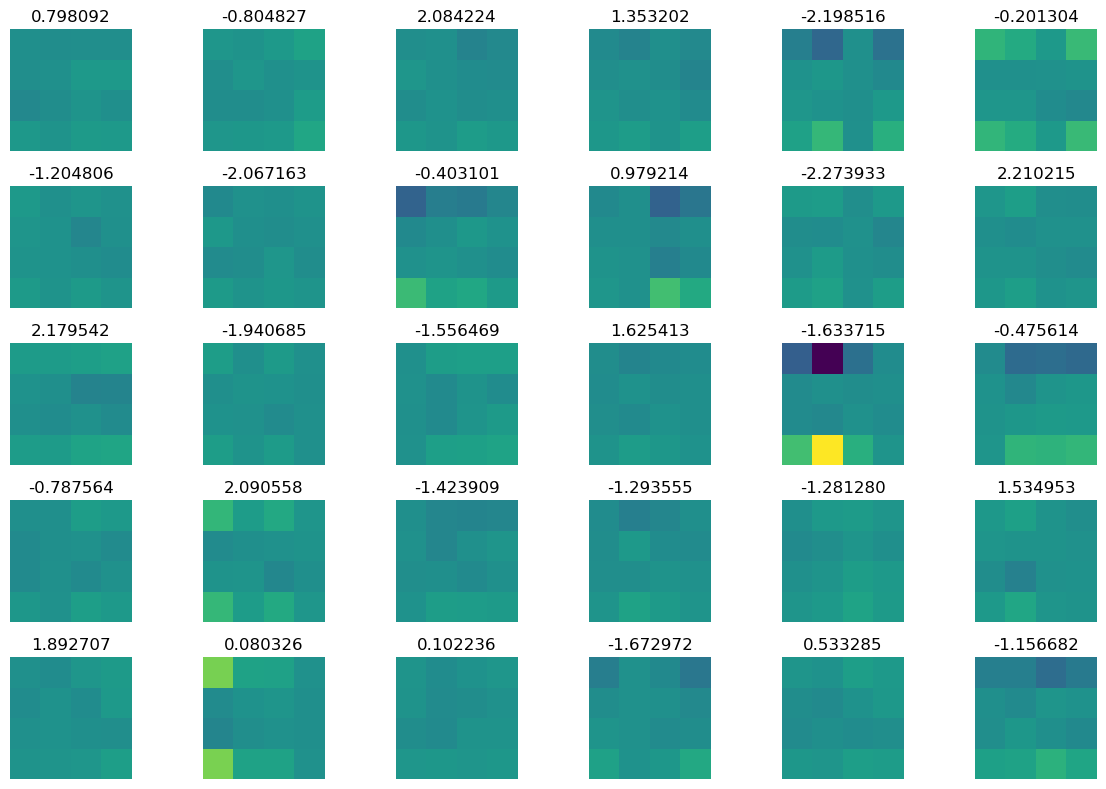

In [12]:
# Create random data for 50 figures (4x4 matrices)
num_figures = 30
figure_size = 4

# Calculate the grid dimensions (rows x columns)
num_rows = 5
num_cols = 6

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the figures and plot them on subplots
for i, ax in enumerate(axes):
    ax.imshow(train[i].T, cmap='viridis', origin='lower', vmin=train[0:num_figures+1].min(), vmax=train[0:num_figures+1].max())
    ax.set_title(f'{Bxy_train[i]:2f}')
    ax.axis('off')  # Turn off axis labels
plt.tight_layout()
plt.show()

### Model define

In [13]:
# train = np.concatenate((train, valid), axis=0)
# Bxy_train = np.concatenate((Bxy_train, Bxy_valid), axis=0)
# del valid, Bxy_valid

In [14]:
# define model 
model = keras.models.Sequential()

# LBN layer
input_shape    = (4,4) # 4 particles, 16 vector components
N_combinations = 5      # number of composite particles/rest frames
model.add(LBNLayer(input_shape, 
                   N_combinations, 
                   boost_mode=LBN.PAIRS,
                   features=["E", "pt", "eta", "phi", "m", "pair_cos"],))

# Simple DNN hidden layers
model.add(layers.Dense(units=32, activation='elu'))
model.add(layers.Dense(units=32, activation='elu'))
model.add(layers.Dense(units=16, activation='elu'))
model.add(layers.Dense(units=16, activation='elu'))
model.add(layers.Dense(units=8, activation='elu'))
model.add(layers.Dense(units=8, activation='elu'))

# Last dense layer
model.add(layers.Dense(units=1, activation='linear'))

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
model.summary()

2023-10-27 06:05:52.992527: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46696 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:01:00.0, compute capability: 8.6
2023-10-27 06:05:52.993291: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46696 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:25:00.0, compute capability: 8.6


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LBN (LBNLayer)              (None, 35)                40        
                                                                 
 dense (Dense)               (None, 32)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 8)                 7

In [15]:
from keras.utils import plot_model
plot_model(model, to_file='lbn-nn_model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
# Fit the model
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            min_delta=0.0001,
                                            patience=10,
                                            mode='auto',
                                            baseline=None,
                                            restore_best_weights=False)
history = model.fit(
    x=train, 
    y=Bxy_train, 
    validation_data=(valid, Bxy_valid), 
    epochs=100, 
    batch_size=512, 
    callbacks=stop_early
)
print("\nFinish!")

Epoch 1/100


2023-10-27 06:05:57.262012: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-27 06:05:57.268701: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe82401b320 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-27 06:05:57.268747: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2023-10-27 06:05:57.268759: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA RTX A6000, Compute Capability 8.6
2023-10-27 06:05:57.277426: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-27 06:05:57.414963: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-27 06:05:57.54068

155/155 [==============================] - 6s 9ms/step - loss: 1.6635 - val_loss: 1.0987
Epoch 2/100
155/155 [==============================] - 1s 8ms/step - loss: 0.9092 - val_loss: 0.8271
Epoch 3/100
155/155 [==============================] - 1s 8ms/step - loss: 0.7490 - val_loss: 0.7056
Epoch 4/100
155/155 [==============================] - 1s 8ms/step - loss: 0.6416 - val_loss: 0.6188
Epoch 5/100
155/155 [==============================] - 1s 8ms/step - loss: 0.5481 - val_loss: 0.5078
Epoch 6/100
155/155 [==============================] - 1s 8ms/step - loss: 0.4621 - val_loss: 0.4537
Epoch 7/100
155/155 [==============================] - 1s 8ms/step - loss: 0.3963 - val_loss: 0.3832
Epoch 8/100
155/155 [==============================] - 1s 8ms/step - loss: 0.3434 - val_loss: 0.3494
Epoch 9/100
155/155 [==============================] - 1s 8ms/step - loss: 0.3158 - val_loss: 0.3106
Epoch 10/100
155/155 [==============================] - 1s 8ms/step - loss: 0.2969 - val_loss: 0.3020
E

In [17]:
Bxy_pred = model.predict(test)

310/310 [==============================] - 1s 2ms/step


RMSE: 0.20286430098968145
MAX of pred: 2.449566602706909; MIN of pred: -2.3204989433288574
MAX of test: 2.2531798567713524; MIN of test: -2.290460800626403


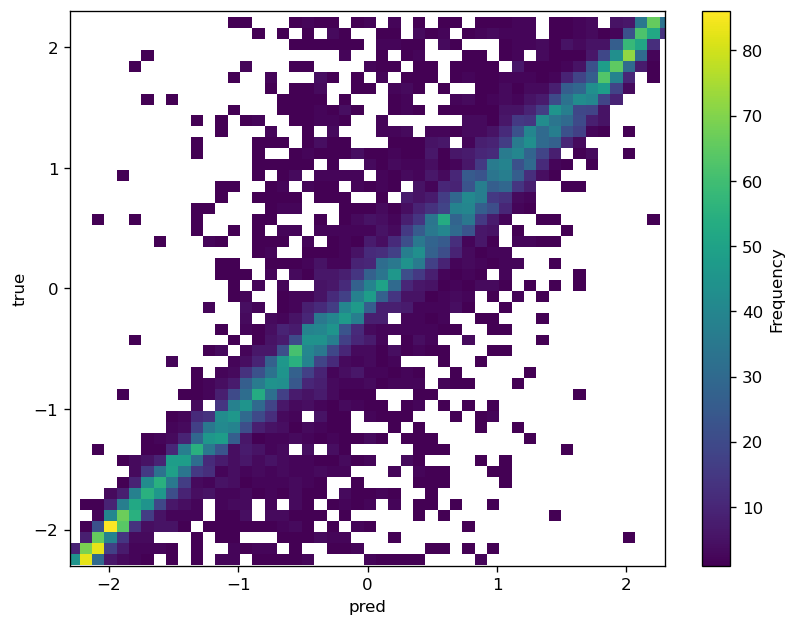

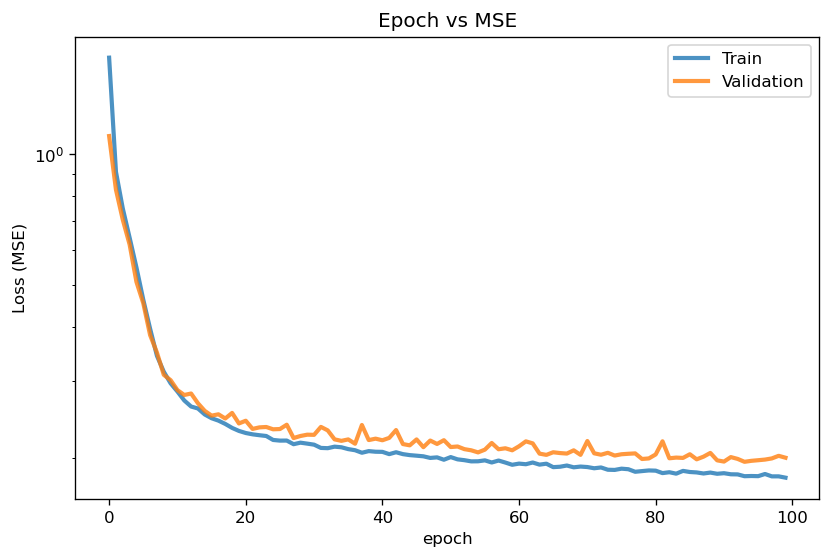

In [18]:
from sklearn.metrics import mean_squared_error

print(f'''RMSE: {mean_squared_error(Bxy_test, Bxy_pred)}
MAX of pred: {Bxy_pred.max()}; MIN of pred: {Bxy_pred.min()}
MAX of test: {Bxy_test.max()}; MIN of test: {Bxy_test.min()}''')

def plot_2d_histogram(pred, test, bins=50):
    # Create the 2D histogram with specified bins
    hist, xedges, yedges = np.histogram2d(pred.flatten(), test, bins=(bins, bins))

    # Create a masked array to set empty regions to the specified color
    hist = np.ma.masked_where(hist == 0, hist)

    # Plot the 2D histogram with the specified color for empty regions
    fig = plt.figure(figsize=(8, 6), dpi=120)
    plt.pcolormesh(xedges, yedges, hist.T, cmap="viridis")
    cbar = plt.colorbar()
    cbar.set_label("Frequency")
    plt.xlim([-2.3, 2.3])
    plt.ylim([-2.3, 2.3])
    plt.xlabel("pred")
    plt.ylabel("true")
    plt.show()
    plt.close()

plot_2d_histogram(Bxy_pred.flatten(), Bxy_test)

fig = plt.figure(figsize=(8,5), dpi=120)
plt.plot(history.history['loss'], lw=2.5, label='Train', alpha=.8)
plt.plot(history.history['val_loss'], lw=2.5, label='Validation', alpha=.8)
plt.semilogy()
plt.title('Epoch vs MSE')
plt.xlabel('epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='best')
plt.show()
plt.close()

In [19]:
# plt.hist(CGLMP['Bxy'], bins=50)
# plt.title("Original Bxy")
# print(CGLMP['Bxy'].max(), CGLMP['Bxy'].min())
# print("std:", CGLMP['Bxy'].std())
# print("mean:", CGLMP['Bxy'].mean())
# print(len(CGLMP['Bxy']))
# plt.show()

# plt.hist(Higgs['m'], bins=50)
# plt.title("Original Higgs mass")
# print(Higgs['m'].max(), (Higgs['m'].min()))
# print("std:", (Higgs['m'].std()))
# print("mean:", (Higgs['m'].mean()))
# print(len((Higgs['m'])))

### Backgroud

In [20]:
def get_files_names(path):
    files_name = glob.glob(path)
    return files_name

path = "../../../../truth/background/*.npz"
files_name = get_files_names(path)
print(files_name)

def get_data(path):
    try:
        with np.load(path, allow_pickle=True) as f:
            data_dict = {name: f[name] for name in f.files}
            return pd.DataFrame(data_dict)
    except FileNotFoundError:
        print("File not found!")
        return pd.DataFrame()
    
files = []
files_name.sort()
for f in files_name:
    files.append(get_data(f))
    
# need to check the order of data name.
print(files_name)

# need to follow the order of data name.
(
    CGLMP,
    Higgs,
    LeadLep,
    LepM,
    LepP,
    NuM,
    NuP,
    MET,
    Wm,
    Wp,
    diLep,
    SubLep,
    Xi,
) = files

del files_name, files
gc.collect()

['../../../../truth/background/LeptonP.npz', '../../../../truth/background/subLeadLepton.npz', '../../../../truth/background/CGLMP.npz', '../../../../truth/background/xi_xyz.npz', '../../../../truth/background/diLepton.npz', '../../../../truth/background/LeadLepton.npz', '../../../../truth/background/MET.npz', '../../../../truth/background/Higgs.npz', '../../../../truth/background/WmBoson.npz', '../../../../truth/background/LpNu.npz', '../../../../truth/background/LmNu.npz', '../../../../truth/background/LeptonM.npz', '../../../../truth/background/WpBoson.npz']
['../../../../truth/background/CGLMP.npz', '../../../../truth/background/Higgs.npz', '../../../../truth/background/LeadLepton.npz', '../../../../truth/background/LeptonM.npz', '../../../../truth/background/LeptonP.npz', '../../../../truth/background/LmNu.npz', '../../../../truth/background/LpNu.npz', '../../../../truth/background/MET.npz', '../../../../truth/background/WmBoson.npz', '../../../../truth/background/WpBoson.npz', '.

12541

In [21]:
# Some constants
GEV = 1e3
# RMV_EVT = [638488, 835579, 2168342] # escape some mathmetical errors.
RMV_EVT = [] # escape some mathmetical errors.

In [22]:
# Kinemetic info of leptons.
lep_kin = pd.DataFrame({
    'lep_p_E' : LepP['E'],
    'lep_p_px': LepP['px'],
    'lep_p_py': LepP['py'],
    'lep_p_pz': LepP['pz'],
    'lep_m_E' : LepM['E'],
    'lep_m_px': LepM['px'],
    'lep_m_py': LepM['py'],
    'lep_m_pz': LepM['pz'],
})/GEV

# check format l+ -> (E, px, py, pz); then, append l- with the same format of l+.
print(lep_kin.shape)
lep_kin.drop(RMV_EVT, inplace=True)
print(lep_kin.shape)
lep_kin.head(5)

(5475536, 8)
(5475536, 8)


,lep_p_E,lep_p_px,lep_p_py,lep_p_pz,lep_m_E,lep_m_px,lep_m_py,lep_m_pz
0,74.467914,-40.960633,1.786365,-62.165145,39.850980,9.973058,17.088891,34.591867
1,51.507348,25.584187,39.103633,21.664768,174.719250,-3.526821,29.727287,172.135578
2,44.308730,-6.140227,-31.041615,-31.015609,118.062672,-19.257135,-61.463059,-98.945688
3,96.211930,30.624691,17.315246,-89.549063,143.211266,-40.423527,-24.538162,-135.178703
4,677.248250,-31.194699,-87.115109,670.897187,231.362469,31.357400,153.175703,170.535953


In [23]:
# Kinemetic info of neutirnos.
nu_kin = pd.DataFrame({
    'nu_p_E' : NuP['E'],
    'nu_p_px': NuP['px'],
    'nu_p_py': NuP['py'],
    'nu_p_pz': NuP['pz'],
    'nu_m_E' : NuM['E'],
    'nu_m_px': NuM['px'],
    'nu_m_py': NuM['py'],
    'nu_m_pz': NuM['pz'],
})/GEV

# check format nu+ -> (E, px, py, pz); then, append nu- with the same format of l+.
print(nu_kin.shape)
nu_kin.drop(RMV_EVT, inplace=True)
print(nu_kin.shape)
nu_kin.head(5)

(5475536, 8)
(5475536, 8)


,nu_p_E,nu_p_px,nu_p_py,nu_p_pz,nu_m_E,nu_m_px,nu_m_py,nu_m_pz
0,319.764187,-21.080592,38.066316,-316.789688,1.265051,0.608586,1.034862,-0.398796
1,40.292387,-35.684840,-13.753254,12.685287,606.691312,18.281611,-47.618680,604.543312
2,45.765156,-32.778430,25.774932,18.859404,56.315598,-36.054539,16.657029,-39.925684
3,41.218965,-31.824426,-15.021311,-21.460877,96.096031,33.482984,13.422257,-89.068398
4,354.462969,32.892043,-14.214022,352.647219,7.301956,-2.736553,-3.677903,-5.683561


In [24]:
# CGLMP.
CGLMP = pd.DataFrame({
    'Bxy' : CGLMP['Bxy'],
    'Byz' : CGLMP['Byz'],
    'Bzx' : CGLMP['Bzx'],
})

# check
print(CGLMP.shape)
CGLMP.drop(RMV_EVT, inplace=True)
print(CGLMP.shape)
CGLMP.head(5)

(5475536, 3)
(5475536, 3)


,Bxy,Byz,Bzx
0,-10.99960,0.437789,-0.704145
1,-6.59135,0.286090,-2.843030
2,7.21567,11.635000,11.686500
3,15.84240,-2.568110,-2.548100
4,-2.42691,5.775540,-3.659570


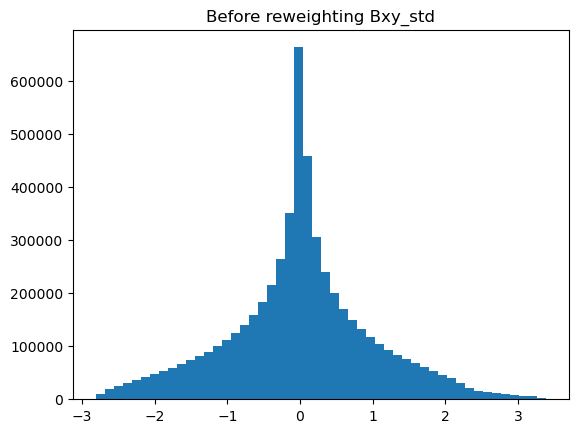

3.3902968253533903 -2.814729277803547
std: 1.000000000000001
5475536


In [25]:
SCALAR = StandardScaler()
Bxy_std = SCALAR.fit_transform([[x] for x in CGLMP['Bxy']]).flatten() # zero mean and unit variance
plt.hist(Bxy_std, bins=50)
plt.title("Before reweighting Bxy_std")
plt.show()
print(Bxy_std.max(), Bxy_std.min())
print("std:", Bxy_std.std())
print(len(Bxy_std))

In [26]:
# Undersampling to an uniform distribution

n = int(1e2)
step = (Bxy_std.max() - Bxy_std.min())/n
intervals = [Bxy_std.min() + i*step for i in range(n)]

sampling = int(1e3)
indices_arr = np.empty((n-1, sampling), dtype=int)
for i in range(n-1):
    try:
        indices_arr[i] = np.random.choice(np.where((intervals[i]<Bxy_std)*(Bxy_std<=intervals[i+1]))[0], size=sampling, replace=False)
    except ValueError:
        print("Cannot take a larger sample than population when 'replace=False")
        break

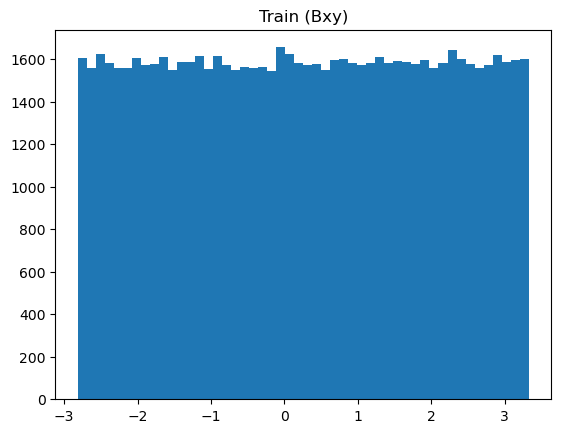

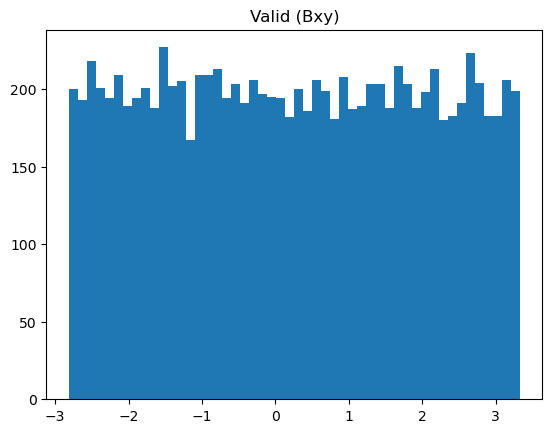

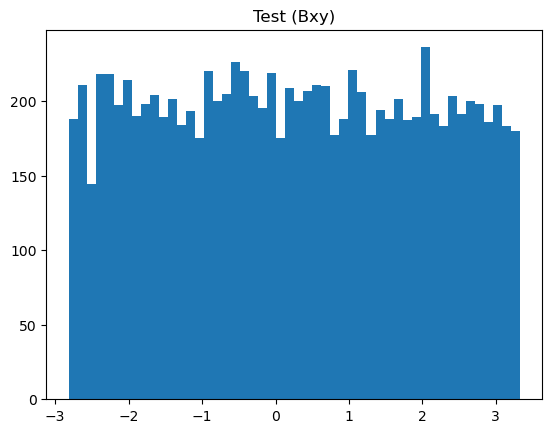

With the same shapes...

Training data shape: (79200, 4, 4)
Testing data shape: (9900, 4, 4)
Validation data shape: (9900, 4, 4)
None


In [27]:
from sklearn.model_selection import train_test_split

lepton_features   = ['lep_p_E','lep_p_px','lep_p_py','lep_p_pz',
                    'lep_m_E','lep_m_px','lep_m_py','lep_m_pz']
neutrino_features = ['nu_p_E','nu_p_px','nu_p_py','nu_p_pz',
                    'nu_m_E','nu_m_px','nu_m_py','nu_m_pz']

def reshape_features(inputs, features):
    outputs = np.stack([inputs[features[0:4]],
                        inputs[features[4:8]]], axis=1)
    return outputs

train_indices, temp_indices = train_test_split(indices_arr.flatten(), train_size=0.8, test_size=0.2, random_state=42)
valid_indices, test_indices = train_test_split(temp_indices, train_size=0.5, test_size=0.5, random_state=42)

lep_train = reshape_features(lep_kin.iloc[train_indices], lepton_features)
lep_valid = reshape_features(lep_kin.iloc[valid_indices], lepton_features)
lep_test  = reshape_features(lep_kin.iloc[test_indices],  lepton_features)

nu_train = reshape_features(nu_kin.iloc[train_indices], neutrino_features)
nu_valid = reshape_features(nu_kin.iloc[valid_indices], neutrino_features)
nu_test  = reshape_features(nu_kin.iloc[test_indices],  neutrino_features)

Bxy_train = Bxy_std[train_indices]
Bxy_valid = Bxy_std[valid_indices]
Bxy_test  = Bxy_std[test_indices]
plt.hist(Bxy_train, bins=50)
plt.title("Train (Bxy)")
plt.show()
plt.hist(Bxy_valid, bins=50)
plt.title("Valid (Bxy)")
plt.show()
plt.hist(Bxy_test, bins=50)
plt.title("Test (Bxy)")
plt.show()

def stack_parts(input1, input2):
    outputs = np.concatenate([input1, input2], axis=1)
    return outputs

if (lep_train.shape == nu_train.shape and 
    lep_test.shape  == nu_test.shape and 
    lep_valid.shape == nu_valid.shape):
    print('With the same shapes...\n')
    # print(f'Training data shape: {lep_train.shape}\nTesting data shape: {lep_test.shape}\nValidation data shape: {lep_valid.shape}')
    train = stack_parts(lep_train, nu_train)
    valid = stack_parts(lep_valid, nu_valid)
    test  = stack_parts(lep_test , nu_test)

    print(print(f'Training data shape: {train.shape}\nTesting data shape: {test.shape}\nValidation data shape: {valid.shape}'))
    
    del (train_indices, temp_indices, valid_indices, test_indices,
        lep_train, lep_valid, lep_test,
        nu_train, nu_valid, nu_test)
    gc.collect()
    
else:
    print('The shape of leptons are NOT the same with neutrinos shape...\n')
    print(f'Training data shape: {lep_train.shape}, {nu_train.shape}\nTesting data shape: {lep_test.shape}, {nu_test.shape}\nValidation data shape: {lep_valid.shape}, {nu_valid.shape}')

In [28]:
Bxy_pred = model.predict(test)

310/310 [==============================] - 1s 2ms/step


RMSE: 2.6702731716372186
MAX of pred: 2.115987539291382; MIN of pred: -5.079207897186279
MAX of test: 3.327062855247273; MIN of test: -2.813924110680603


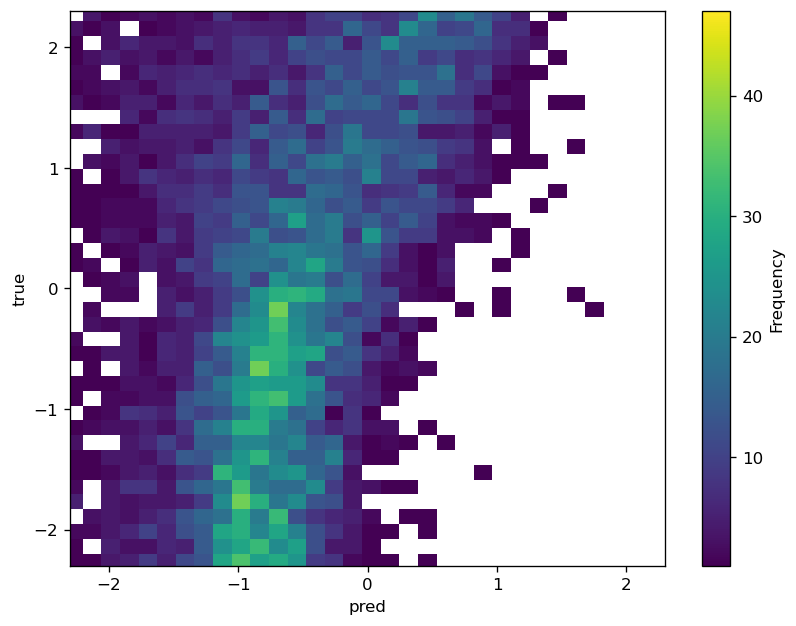

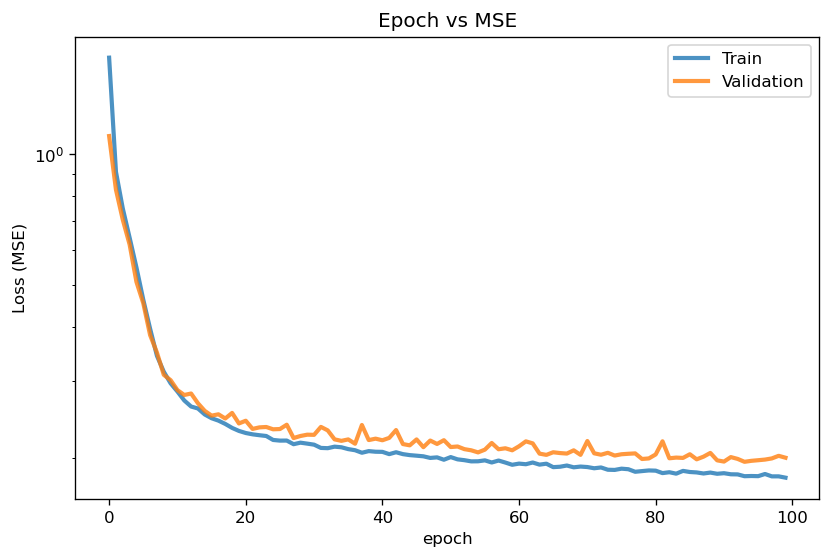

In [29]:
from sklearn.metrics import mean_squared_error

print(f'''RMSE: {mean_squared_error(Bxy_test, Bxy_pred)}
MAX of pred: {Bxy_pred.max()}; MIN of pred: {Bxy_pred.min()}
MAX of test: {Bxy_test.max()}; MIN of test: {Bxy_test.min()}''')

def plot_2d_histogram(pred, test, bins=50):
    # Create the 2D histogram with specified bins
    hist, xedges, yedges = np.histogram2d(pred.flatten(), test, bins=(bins, bins))

    # Create a masked array to set empty regions to the specified color
    hist = np.ma.masked_where(hist == 0, hist)

    # Plot the 2D histogram with the specified color for empty regions
    fig = plt.figure(figsize=(8, 6), dpi=120)
    plt.pcolormesh(xedges, yedges, hist.T, cmap="viridis")
    cbar = plt.colorbar()
    cbar.set_label("Frequency")
    plt.xlim([-2.3, 2.3])
    plt.ylim([-2.3, 2.3])
    plt.xlabel("pred")
    plt.ylabel("true")
    plt.show()
    plt.close()

plot_2d_histogram(Bxy_pred.flatten(), Bxy_test)

fig = plt.figure(figsize=(8,5), dpi=120)
plt.plot(history.history['loss'], lw=2.5, label='Train', alpha=.8)
plt.plot(history.history['val_loss'], lw=2.5, label='Validation', alpha=.8)
plt.semilogy()
plt.title('Epoch vs MSE')
plt.xlabel('epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='best')
plt.show()
plt.close()